**K-Mean clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

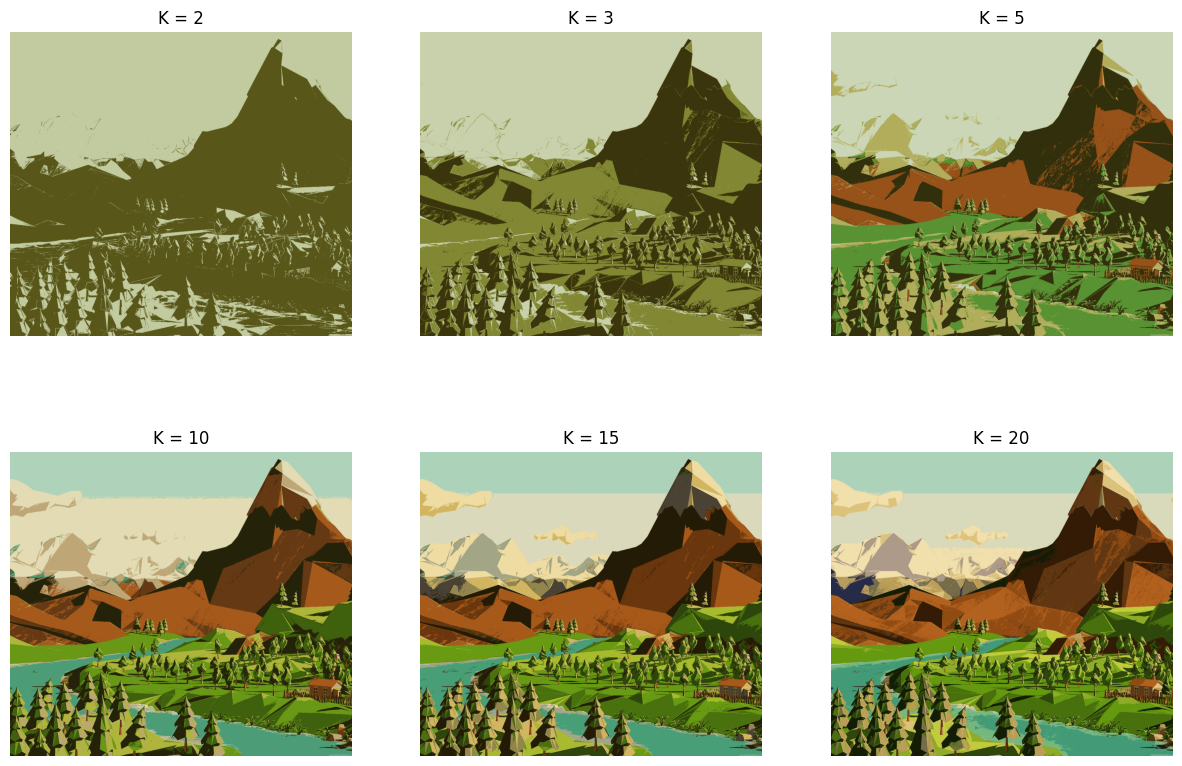

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Load the image
image_path = 'pic2.jpg'
img = Image.open(image_path)
img_array = np.array(img)

# Reshape the image to be suitable for K-Means
height, width, channels = img_array.shape
img_reshaped = img_array.reshape((height * width, channels))

# Function to apply K-Means and create a segmented image
def apply_kmeans(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(img_reshaped)
    labels = kmeans.predict(img_reshaped)
    clustered_img_array = np.array([kmeans.cluster_centers_[label] for label in labels])
    clustered_img = clustered_img_array.reshape((height, width, channels)).astype(np.uint8)
    return clustered_img

# K values to try
k_values = [2, 3, 5, 10, 15, 20]

# Plot the images for each K value
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    segmented_img = apply_kmeans(k)
    plt.subplot(2, 3, i+1)
    plt.imshow(segmented_img)
    plt.title(f'K = {k}')
    plt.axis('off')

plt.show()


For the K-Means algorithm, I experimented with different values of K (2, 3, 5, 10, 15, and 20) to evaluate its impact on image segmentation and representation. Here are the findings for each K value:

K=2:
The image was divided into 2 clusters, resulting in a final image with only 2 colors. This segmentation reduced the richness of colors in the original image, leading to a somewhat oversimplified representation.

K=3:
With 3 clusters, the dominance of colors increased, resulting in an improved image. The image was divided into 3 clusters, and 3 colors were shown, providing a better representation compared to K=2.

K=5:
At K=5, the image was divided into 5 clusters, and 5 colors were used to represent the image. This increased the color diversity and improved the overall representation of the image further.

K=10, 15, and 20:
As K increased to 10, 15, and 20, more clusters were formed, and more colors were utilized in the final image. This led to a significant improvement in image representation, resulting in a richer and more detailed output.

Overall, increasing the value of K improved the segmentation and representation of the image, as more clusters were created, capturing finer details and color variations. However, a balance must be struck to avoid excessive clustering, which might lead to overfitting or unnecessary complexity in the image representation.